<a href="https://colab.research.google.com/github/oguzsozen/Kuzushiji_Letter-Recognition/blob/main/Kuzushiji_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
pathDataset = "/content/drive/MyDrive/Colab Notebooks/datasets/Kuzushiji_MNIST"
folders = os.listdir(pathDataset)
folders

['kmnist-train-labels.npz',
 'kmnist-train-imgs.npz',
 'kmnist-test-labels.npz',
 'kmnist-test-imgs.npz']

In [ ]:
def getdata(filePath):
  data = np.load(filePath)
  return data[data.files[0]]

In [ ]:
train_label = getdata(pathDataset + "/" + folders[0])
train_data = getdata(pathDataset + "/" + folders[1])
test_label = getdata(pathDataset + "/" + folders[2])
test_data = getdata(pathDataset + "/" + folders[3])

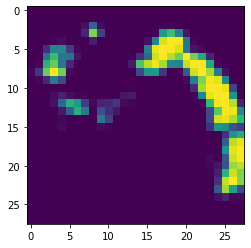

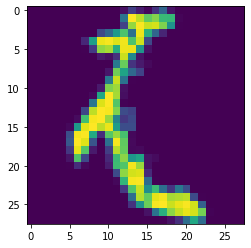

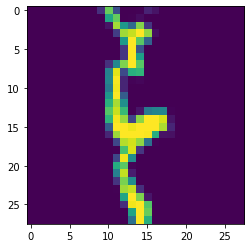

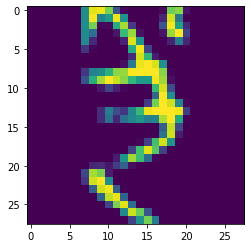

In [ ]:
plt.imshow(train_data[165], interpolation='nearest')
plt.show()
plt.imshow(train_data[23], interpolation='nearest')
plt.show()
plt.imshow(train_data[1948], interpolation='nearest')
plt.show()
plt.imshow(train_data[4063], interpolation='nearest')
plt.show()

In [ ]:
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_label

array([8, 7, 0, ..., 0, 4, 9], dtype=uint8)

In [ ]:
len(set(train_label))

10

In [ ]:
print(train_label.shape)
print(test_label.shape)

(60000,)
(10000,)


In [ ]:
train_data = train_data.reshape((60000, 28, 28, 1))
train_data = train_data.astype('float32') /255

In [ ]:
test_data = test_data.reshape((10000, 28, 28, 1))
test_data = test_data.astype('float32') /255

In [ ]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [ ]:
def myModel():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model=myModel()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
          train_label,
          epochs=5,
          batch_size=64)

Epoch 1/5
938/938 [==============================] - 59s 62ms/step - loss: 0.3558 - accuracy: 0.8897
Epoch 2/5
938/938 [==============================] - 62s 67ms/step - loss: 0.1045 - accuracy: 0.9685
Epoch 3/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0668 - accuracy: 0.9794
Epoch 4/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0471 - accuracy: 0.9858
Epoch 5/5
938/938 [==============================] - 62s 66ms/step - loss: 0.0351 - accuracy: 0.9891


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_label)

313/313 [==============================] - 4s 12ms/step - loss: 0.2472 - accuracy: 0.9468
